## Importing Libraries & Data

In [377]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('darkgrid')
import pandas as pd
import statsmodels.api as sm
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter

import matplotlib.dates as mdates

In [378]:
# Importing Plant & Weather Data

df_plant1 = pd.read_csv('Plant_1_Generation_Data.csv')
df_plant1_w = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

--Power Plant Data Columns--  

DATE_TIME -> date and time of the particular recorded instance  

SOURCE_KEY -> it's a unique identity for the inverters (there can be multiple solar panels attached to a single inverter)  

DC_POWER -> power generated in kW per 15 min time period  

AC_POWER -> power generated in kW per 15 min time period  

DAILY_YIELD -> power generated on a particular day  

TOTAL_YIELD -> total power generated from the very beginning  

In [379]:
df_plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


--Weather Sensor Data Columns--  

DATE_TIME -> date and time of the particular recorded instance  

SOURCE_KEY -> it's a unique identity of the sensor (only one sensor at a plant)  

AMBIENT_TEMPERATURE -> temperature of surrounding environment of the plant  

MODULE_TEMPERATURE -> temperature of the solar panel  

IRRADIATION -> it's a way of messuring amount of sun light coming on the unit area of solar panels  

In [380]:
df_plant1_w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [381]:
df_plant1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [382]:
df_plant1_w.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


## Data Cleaning

In [383]:
#Dropping unneeded columns
df_plant1.drop(['PLANT_ID'], axis=1, inplace=True)

df_plant1_w.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1, inplace=True)



In [384]:
#Converting to correct DateTime format
df_plant1['DATE_TIME']= pd.to_datetime(df_plant1['DATE_TIME'],format='%d-%m-%Y %H:%M')

df_plant1_w['DATE_TIME']= pd.to_datetime(df_plant1_w['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')



In [385]:
#checking for null values
df_plant1.isnull().sum()

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [386]:
#checking for null values
df_plant1_w.isnull().sum()

DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

Questions we are looking to answer in the analysis  


1. Can we identify faulty or suboptimally performing equipment? How?  
2. Can we identify the need for panel cleaning/maintenance? How?  
3. Can we predict the power generation for next couple of days?   

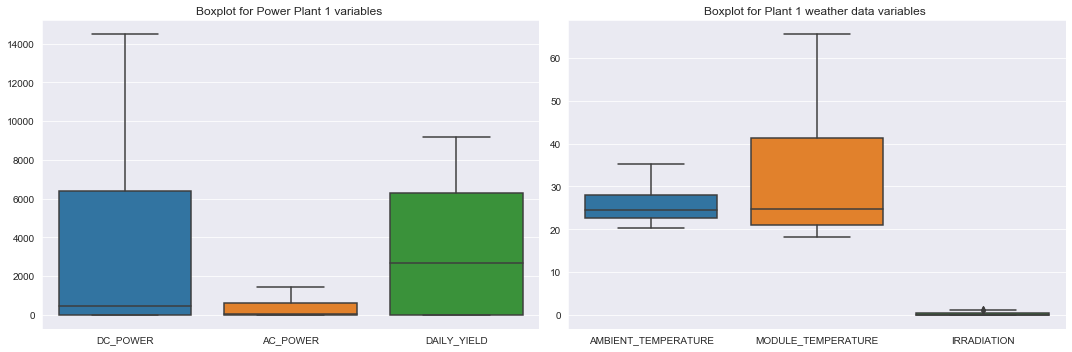

In [387]:
filt = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD'] 
plant_1_f = df_plant1.filter(filt)
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,2,1)

#Plotting Plant 1 Variables
sb.boxplot(data=plant_1_f)
plt.title('Boxplot for Power Plant 1 variables ')


plt.tight_layout()

#Plotting Weather  Variables
filt = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'] 
plant_1_wf = df_plant1_w.filter(filt)
plt.subplot(1,2,2)
sb.boxplot(data=plant_1_wf)
plt.title('Boxplot for Plant 1 weather data variables ')

plt.tight_layout()




Here we can see the ranges and values we would expect to see for both the Plant Data and the Weather Data, this will help frame our analysis to help identify when we are seeing extreme values that are likely correlated with malfunctioning or faulty behaviors.

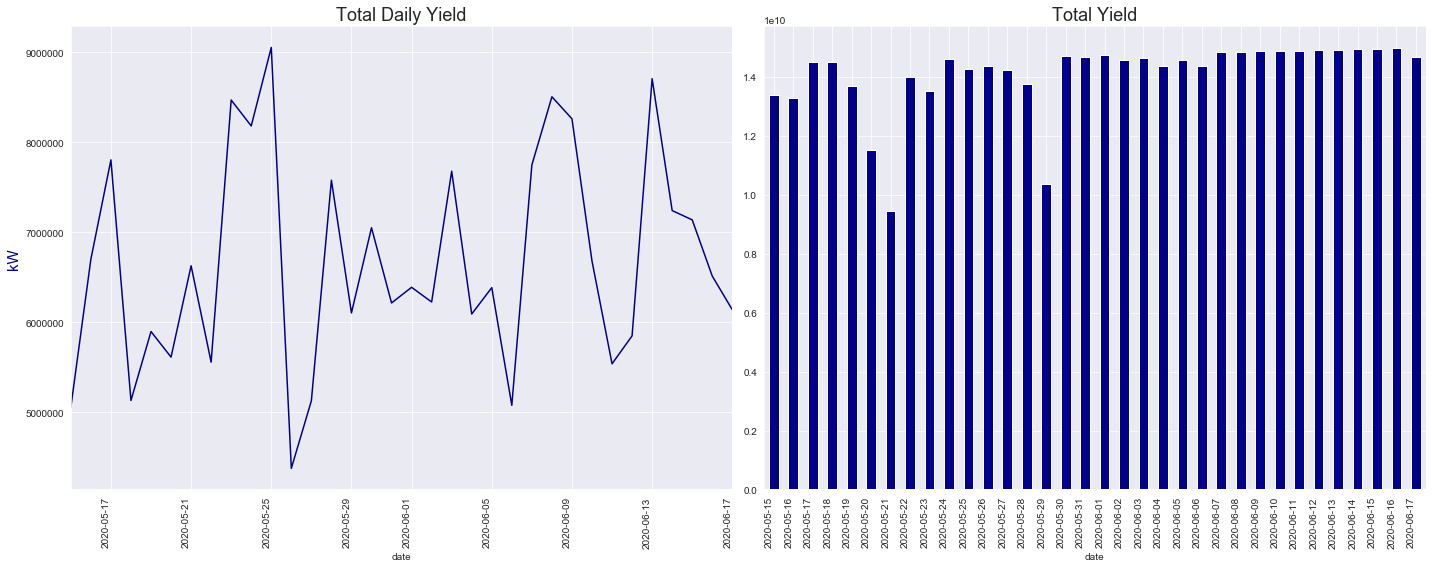

In [388]:
daily_gen=df_plant1.copy()
daily_gen['date']=daily_gen['DATE_TIME'].dt.date

daily_gen=daily_gen.groupby('date').sum()
#plotting total daily yield for all inverters & total yield by day
fig,ax= plt.subplots(ncols=2,figsize=(20,8))
daily_gen['DAILY_YIELD'].plot(ax=ax[0],color='darkblue')
daily_gen['TOTAL_YIELD'].plot(kind='bar',ax=ax[1],color='darkblue')
fig.autofmt_xdate(rotation=90)
ax[0].set_title('Total Daily Yield', size=18)
ax[1].set_title('Total Yield', size=18)
ax[0].set_ylabel('kW',color='darkblue',fontsize=15)

plt.tight_layout()
plt.show()

Here we can visualize Average daily total yield from all inverters and well as the total yield by day. Again, this helps us to frame our analysis in terms of when we are experiencing abnormal values or totals.

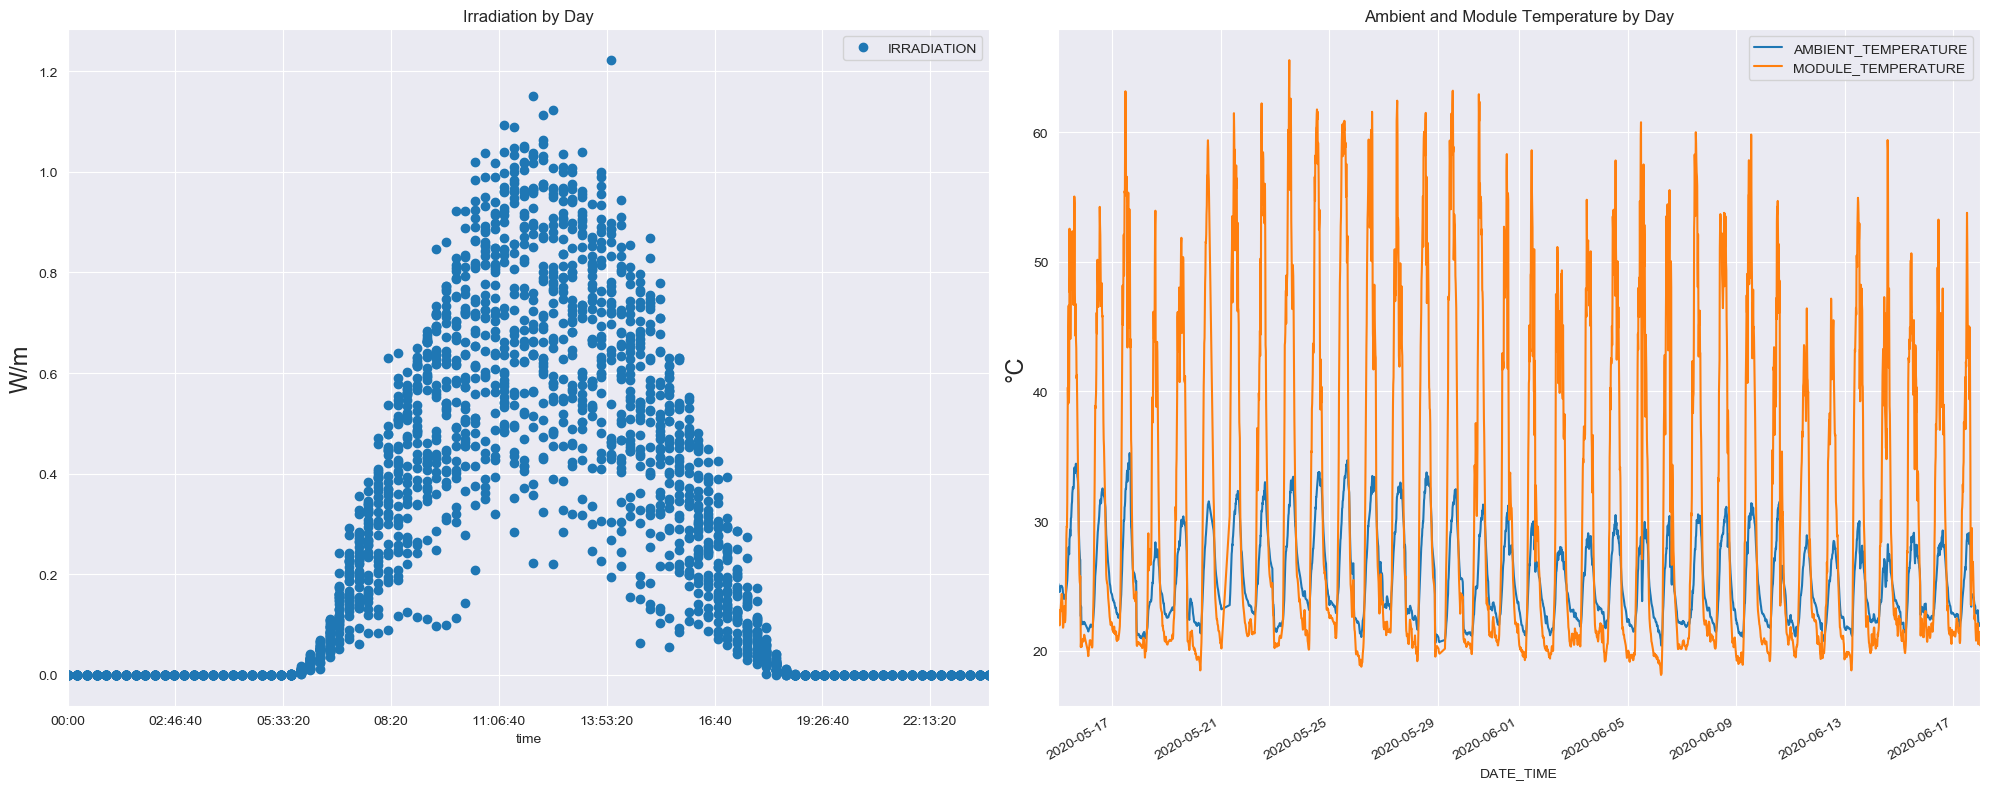

In [389]:
df_sensors=df_plant1_w.groupby('DATE_TIME').sum().reset_index()
df_sensors['time']=df_sensors['DATE_TIME'].dt.time
#plotting irradiation values by day as well as ambient and module temps by day
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,8))
# daily yield plot
df_sensors.plot(x='time',y='IRRADIATION',ax=ax[0],style='o')
# AC & DC power plot
df_sensors.set_index('DATE_TIME').drop('time',1)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(ax=ax[1])

ax[0].set_title('Irradiation by Day',)
ax[1].set_title('Ambient and Module Temperature by Day')
ax[0].set_ylabel('W/m',fontsize=17)
ax[1].set_ylabel('°C',fontsize=17)

plt.tight_layout()
plt.show()

The first graphic here shows the relationship between irradiation, which can be thought of as sun exposure, and time. This essentially shows us that the highest irradiation values occur at roughly midday, and follow a normalized distribution, ramping up in the early morning hours, and falling off at night.  
The 2nd graphic shows us the relationship between ambient temperature and module temperature. This essentially establishes how the module temperature is quite correlated with ambient temperature. IE, higher ambient temp reading = higher module temp.  
We will go into more detail about these variable relationships later.

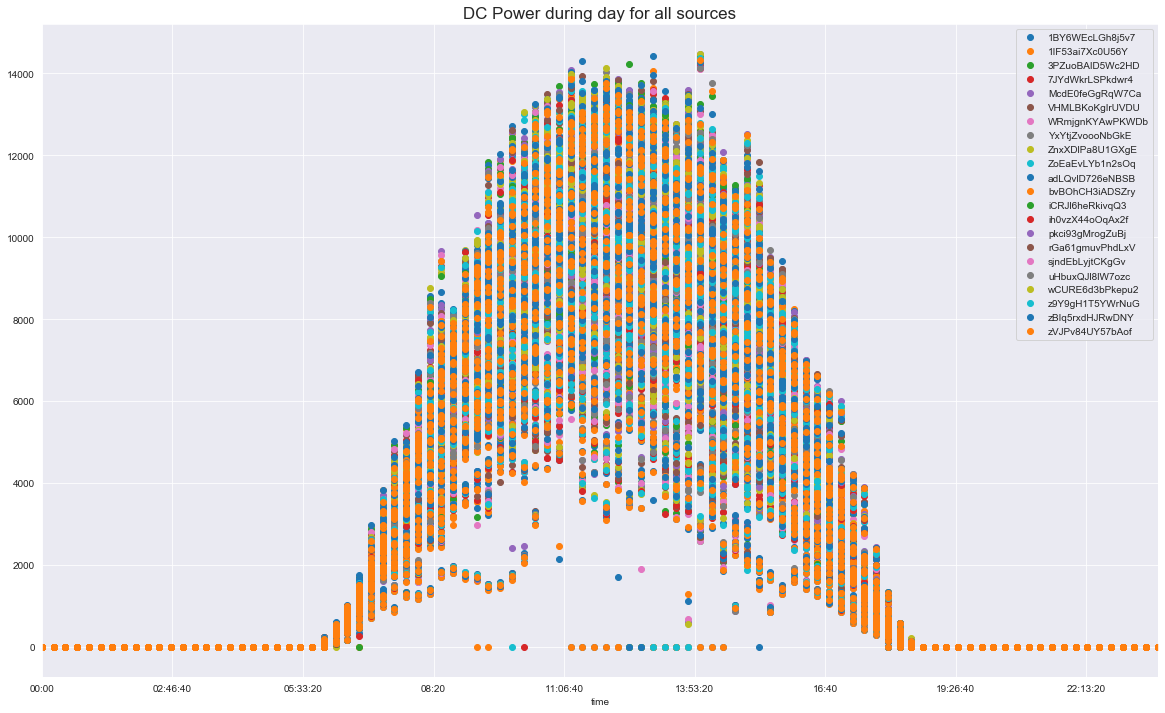

In [390]:

sources=df_plant1.copy()
sources['time']=sources['DATE_TIME'].dt.time
#Plotting all inverter power generation data by time for the whole series of data.
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',figsize=(20,12))
plt.title('DC Power during day for all sources',size=17)
plt.legend()

plt.show()

Here we can see all the inverters power generation data for every day in the time series. There is lots of data here but the main take away from this is that values very low in DC power generation in the middle of the day, where we established irradiation and temperature values are the highest, show that there is some inverters that or malfunctioning or underperforming.  
The next step is to identify these inverters in particular and compare them to find which are underperforming the most or may possibly be malfunctioning. 

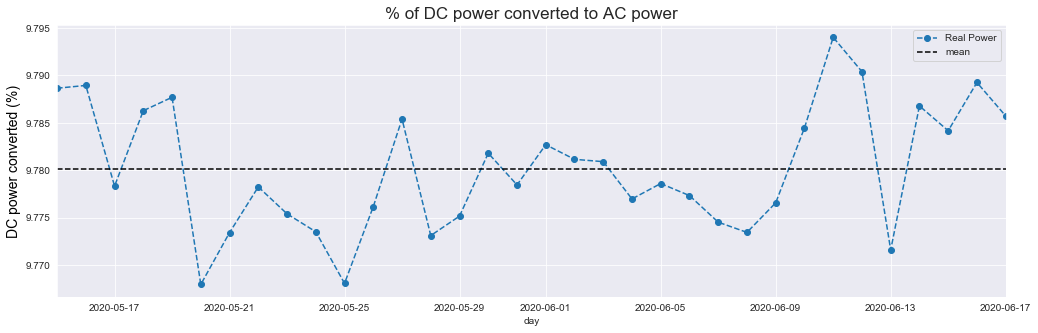

In [391]:
#Creating a new DF that shows the average DC power to AC Power conversion compared to the average.
p_losses=df_plant1.copy()
p_losses['day']=p_losses['DATE_TIME'].dt.date
p_losses=p_losses.groupby('day').sum()
p_losses['losses']=p_losses['AC_POWER']/p_losses['DC_POWER']*100

p_losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted to AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='black')
plt.axhline(p_losses['losses'].mean(),linestyle='--',color='black',label='mean')
plt.legend()
plt.show()

Here we establish that since only around 9.8% of DC Power is converted to AC Power (The power most commonly used by consumers) there is a higher need to focus on producing the most possible DC power and fixing malfunctioning or underperforming equipment since there is nearly a 90% decrease in power when converted to AC Power. 

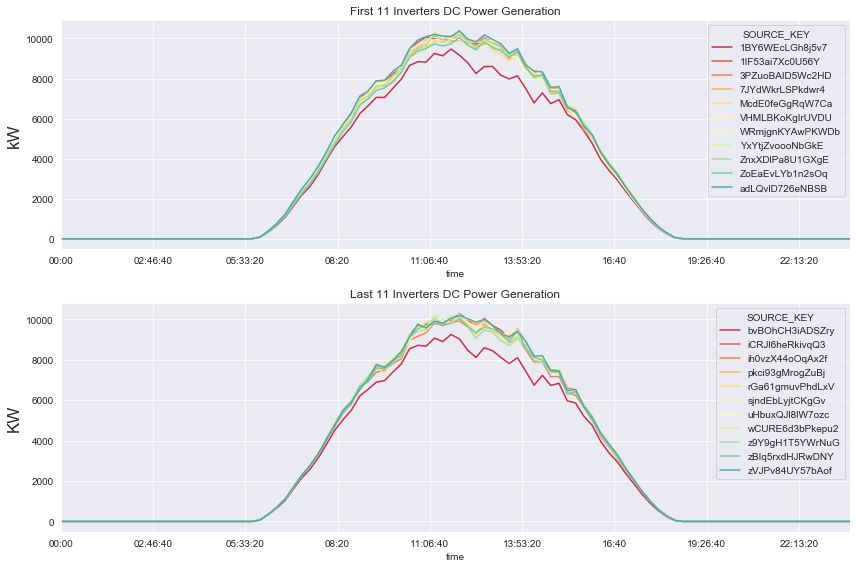

In [392]:
dc_gen=df_plant1.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sb.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(2,1,figsize=(12,8))
#plotting half of the inverters on 2 seperate figures for readablity
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 Inverters DC Power Generation')
ax[1].set_title('Last 11 Inverters DC Power Generation')
ax[0].set_ylabel('kW',fontsize=17)
ax[1].set_ylabel('KW',fontsize=17)

plt.tight_layout()
plt.show()

When we overlay and plot the power generation from all the inverters we can clearly identify 2 inverters that are noticably underperforming in comparison to the other inverters, these are identified by their unique source_key ID's, 'bvBOhCH3iADSZry' & '1BY6WEcLGh8j5v7'.

C:\Users\Renzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Renzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Renzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

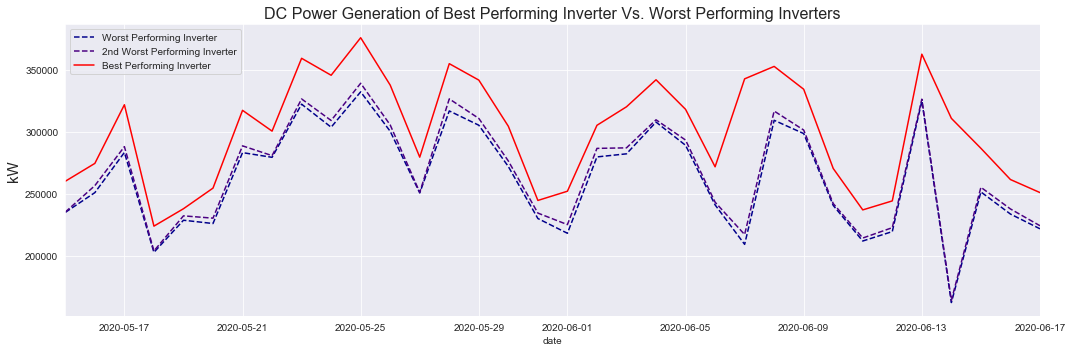

In [393]:
#Singling out identified poor performing inverters as well as top inverter by power generated.
worst_source1=df_plant1[df_plant1['SOURCE_KEY']=='bvBOhCH3iADSZry']
worst_source2=df_plant1[df_plant1['SOURCE_KEY']=='1BY6WEcLGh8j5v7']
best_source=df_plant1[df_plant1['SOURCE_KEY']=='adLQvlD726eNBSB']

worst_source1['date']=worst_source1['DATE_TIME'].dt.date
worst_source1=worst_source1.groupby('date').sum()
worst_source2['date']=worst_source2['DATE_TIME'].dt.date
worst_source2=worst_source2.groupby('date').sum()
best_source['date']=best_source['DATE_TIME'].dt.date
best_source=best_source.groupby('date').sum()


ax=worst_source1['DC_POWER'].plot(color='darkblue',style='--',label='Worst Performing Inverter')
ax=worst_source2['DC_POWER'].plot(color='indigo', style='--',label='2nd Worst Performing Inverter')
ax=best_source['DC_POWER'].plot(color='red', label='Best Performing Inverter')


plt.legend()
ax.set_title('DC Power Generation of Best Performing Inverter Vs. Worst Performing Inverters', size=16)
ax.set_ylabel('kW', size=15)
plt.tight_layout()
plt.show()



Singling out the 2 worst performing inverters compared to the top performing inverter highlights the difference in power generation. Since these inverters are all at the same location and subject to the same enviornmental conditions, the power generation should be nearly identical. Since they are not, this is indicative of malfunctioning or underperforming. 

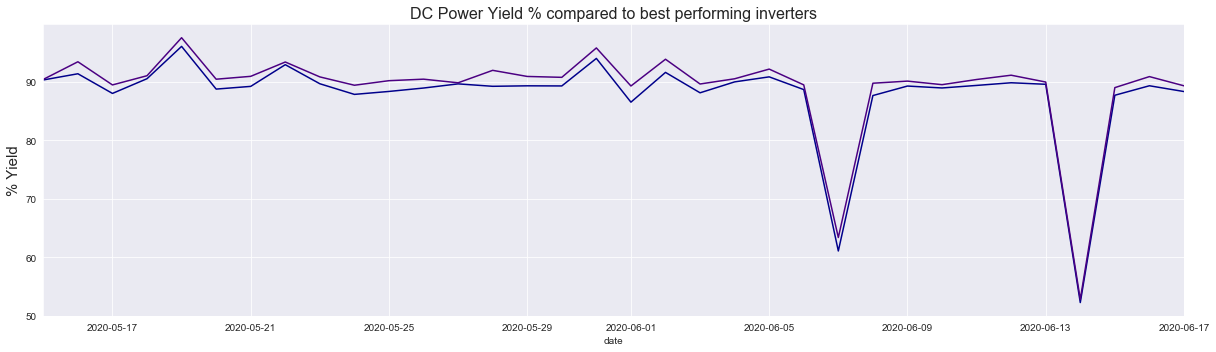

In [394]:
loss_p=worst_source1.copy()
loss_p['% yield diff']=loss_p['DC_POWER']/best_source['DC_POWER']*100
loss_p2=worst_source2.copy()
loss_p2['% yield diff']=loss_p2['DC_POWER']/best_source['DC_POWER']*100



ax=loss_p['% yield diff'].plot(color='darkblue',figsize=(17,5),label='Real Power')
ax=loss_p2['% yield diff'].plot(color='indigo',figsize=(17,5),label='Real Power')

ax.set_title('DC Power Yield % compared to best performing inverters', size=16)
ax.set_ylabel('% Yield', size=15)

plt.tight_layout()
plt.show()

Here we can see that on average these 2 worst inverters are performing at roughly 90% of the normal inverters. What is most noticable is the large dips on particular days where the inverters are performing at almost 50% of the normal inverter yield.

In [395]:
#Single out worst performing index, we only will analyze one since the 2 worst are extremely correlated as shown above.
df_1 = df_plant1[df_plant1['SOURCE_KEY']=='bvBOhCH3iADSZry']
df_1.set_index('DATE_TIME', drop=True, append=False, inplace=True, verify_integrity=False)
#Singling out days were %yield compared to normal inverters is substantially lower as well as only during daylight hours were power is being generated.
df_1_day= df_1.loc['2020-06-14 05:30:00': '2020-06-14 19:30:00']
#Singling out days were %yield compared to normal inverters is substantially lower as well as only during daylight hours were power is being generated.
df_weather=df_plant1_w.copy()
df_weather.set_index('DATE_TIME', drop=True, append=False, inplace=True, verify_integrity=False)
df_weath_1 = df_weather.loc['2020-06-14 05:30:00': '2020-06-14 19:30:00']

result = pd.concat([df_1_day,df_weath_1 ], axis=1, sort= False)

result.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [396]:
#Singling out best performing inverter
df_2 = df_plant1[df_plant1['SOURCE_KEY']=='adLQvlD726eNBSB']
df_2.set_index('DATE_TIME', drop=True, append=False, inplace=True, verify_integrity=False)

#Singling out days were %yield compared to normal inverters is substantially lower for underperforming inverters as well as only during daylight hours were power is being generated.
df_2_day= df_2.loc['2020-06-14 05:30:00': '2020-06-14 19:30:00']

df_weather2=df_plant1_w.copy()
df_weather2.set_index('DATE_TIME', drop=True, append=False, inplace=True, verify_integrity=False)
df_weath_2 = df_weather2.loc['2020-06-14 05:30:00': '2020-06-14 19:30:00']

result2 = pd.concat([df_2_day,df_weath_2 ], axis=1, sort= False)

result2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

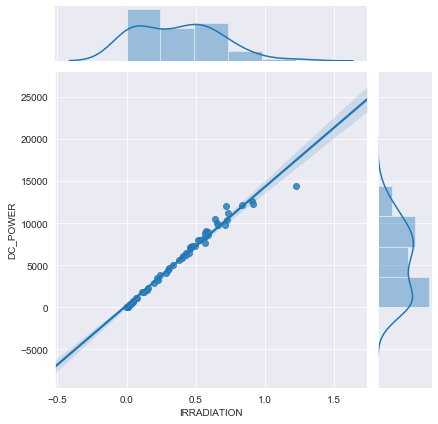

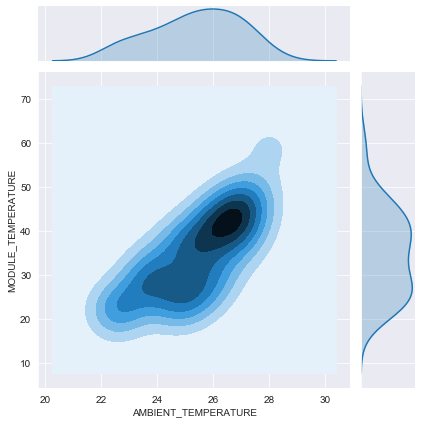

In [397]:
sb.jointplot(x='IRRADIATION', y='DC_POWER', data= result2, kind = 'reg')
sb.jointplot(x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE', data= result2,  kind = 'kde')

Here we see the relationship between DC power generated and irradiation for the optimally performing inverter. As we can see, the relationship is linear and as Irradiation increases so does DC power generated. WE can also see the same is true for module temp and ambient temp.

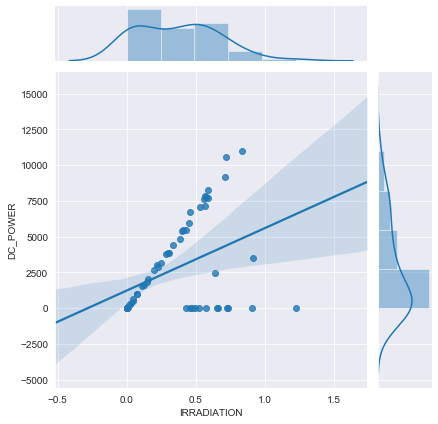

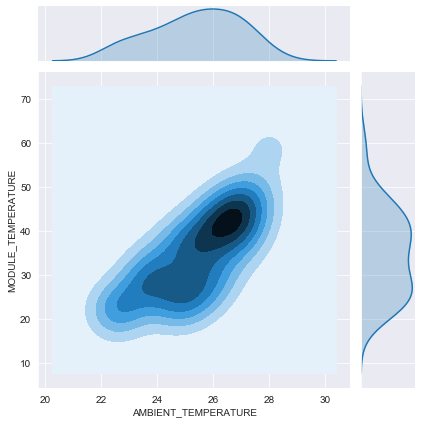

In [398]:
sb.jointplot(x='IRRADIATION', y='DC_POWER', data= result, kind = 'reg')
sb.jointplot(x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE', data= result,  kind = 'kde')

Here we see that for the inverters we identified as malfunctioning, the relationship between irradiation and DC Power generated is extremely off from the baseline we expected to see from the optimaly performing inverters. The module and ambient temp chart below roughly matches the one from above indicating that the expected results based on the weather conditions should be roughly the same. This proves that these inverters are malfunctioning/underperforming compared to the optimal inverters we've identified. 

C:\Users\Renzi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:195: UserWarning: When passing multiple axes, layout keyword is ignored
  UserWarning,
C:\Users\Renzi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


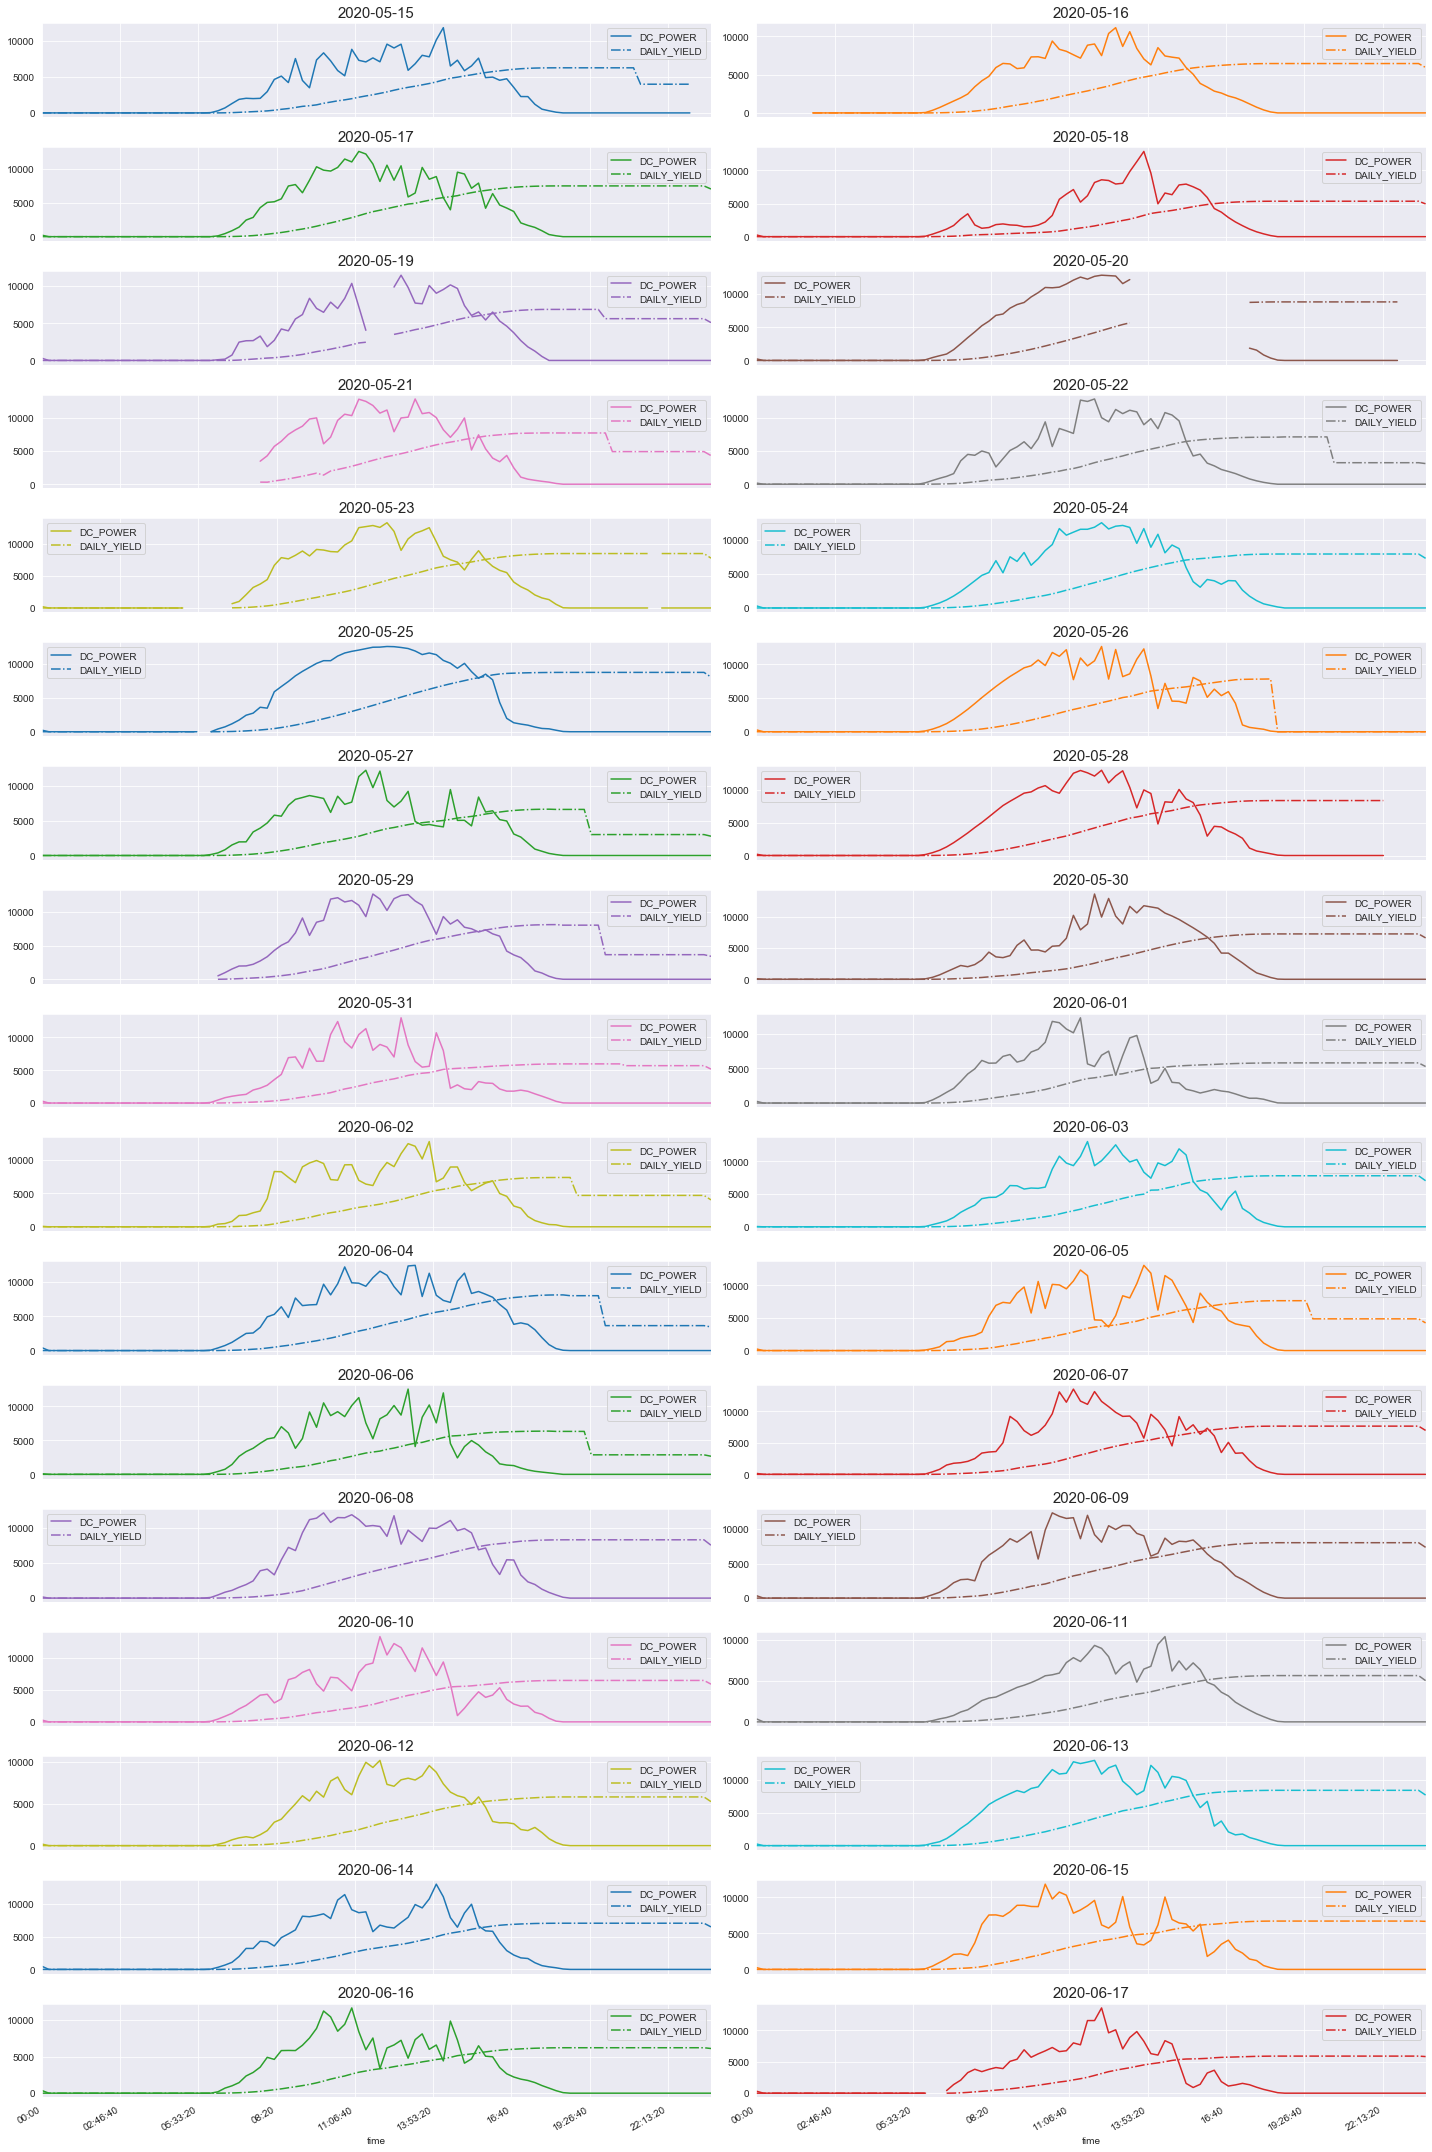

In [399]:
temp1=df_plant1.copy()

temp1['time']=temp1['DATE_TIME'].dt.time
temp1['day']=temp1['DATE_TIME'].dt.date


temp1_sens=df_plant1_w.copy()

temp1_sens['time']=temp1_sens['DATE_TIME'].dt.time
temp1_sens['day']=temp1_sens['DATE_TIME'].dt.date


cols=temp1.groupby(['time','day'])['DC_POWER'].mean().unstack()

ax =temp1.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
temp1.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)
#Looping through to plot DC Power generated and Yield for all inverters by day
i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

Here we see the Dc Power Yields by day for all inverters. It is important to note that when we see null values across the board such as around mid-day on 5-19 and 5-20, this is likely indcative of something other than an inverter level malfucntion since all the inverters are reading null values. This could likely be from something such as an error in the measurement instruments at the plant measuring the recived power, and while this is of concern, is outside of the scope of this analysis. 

C:\Users\Renzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Renzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


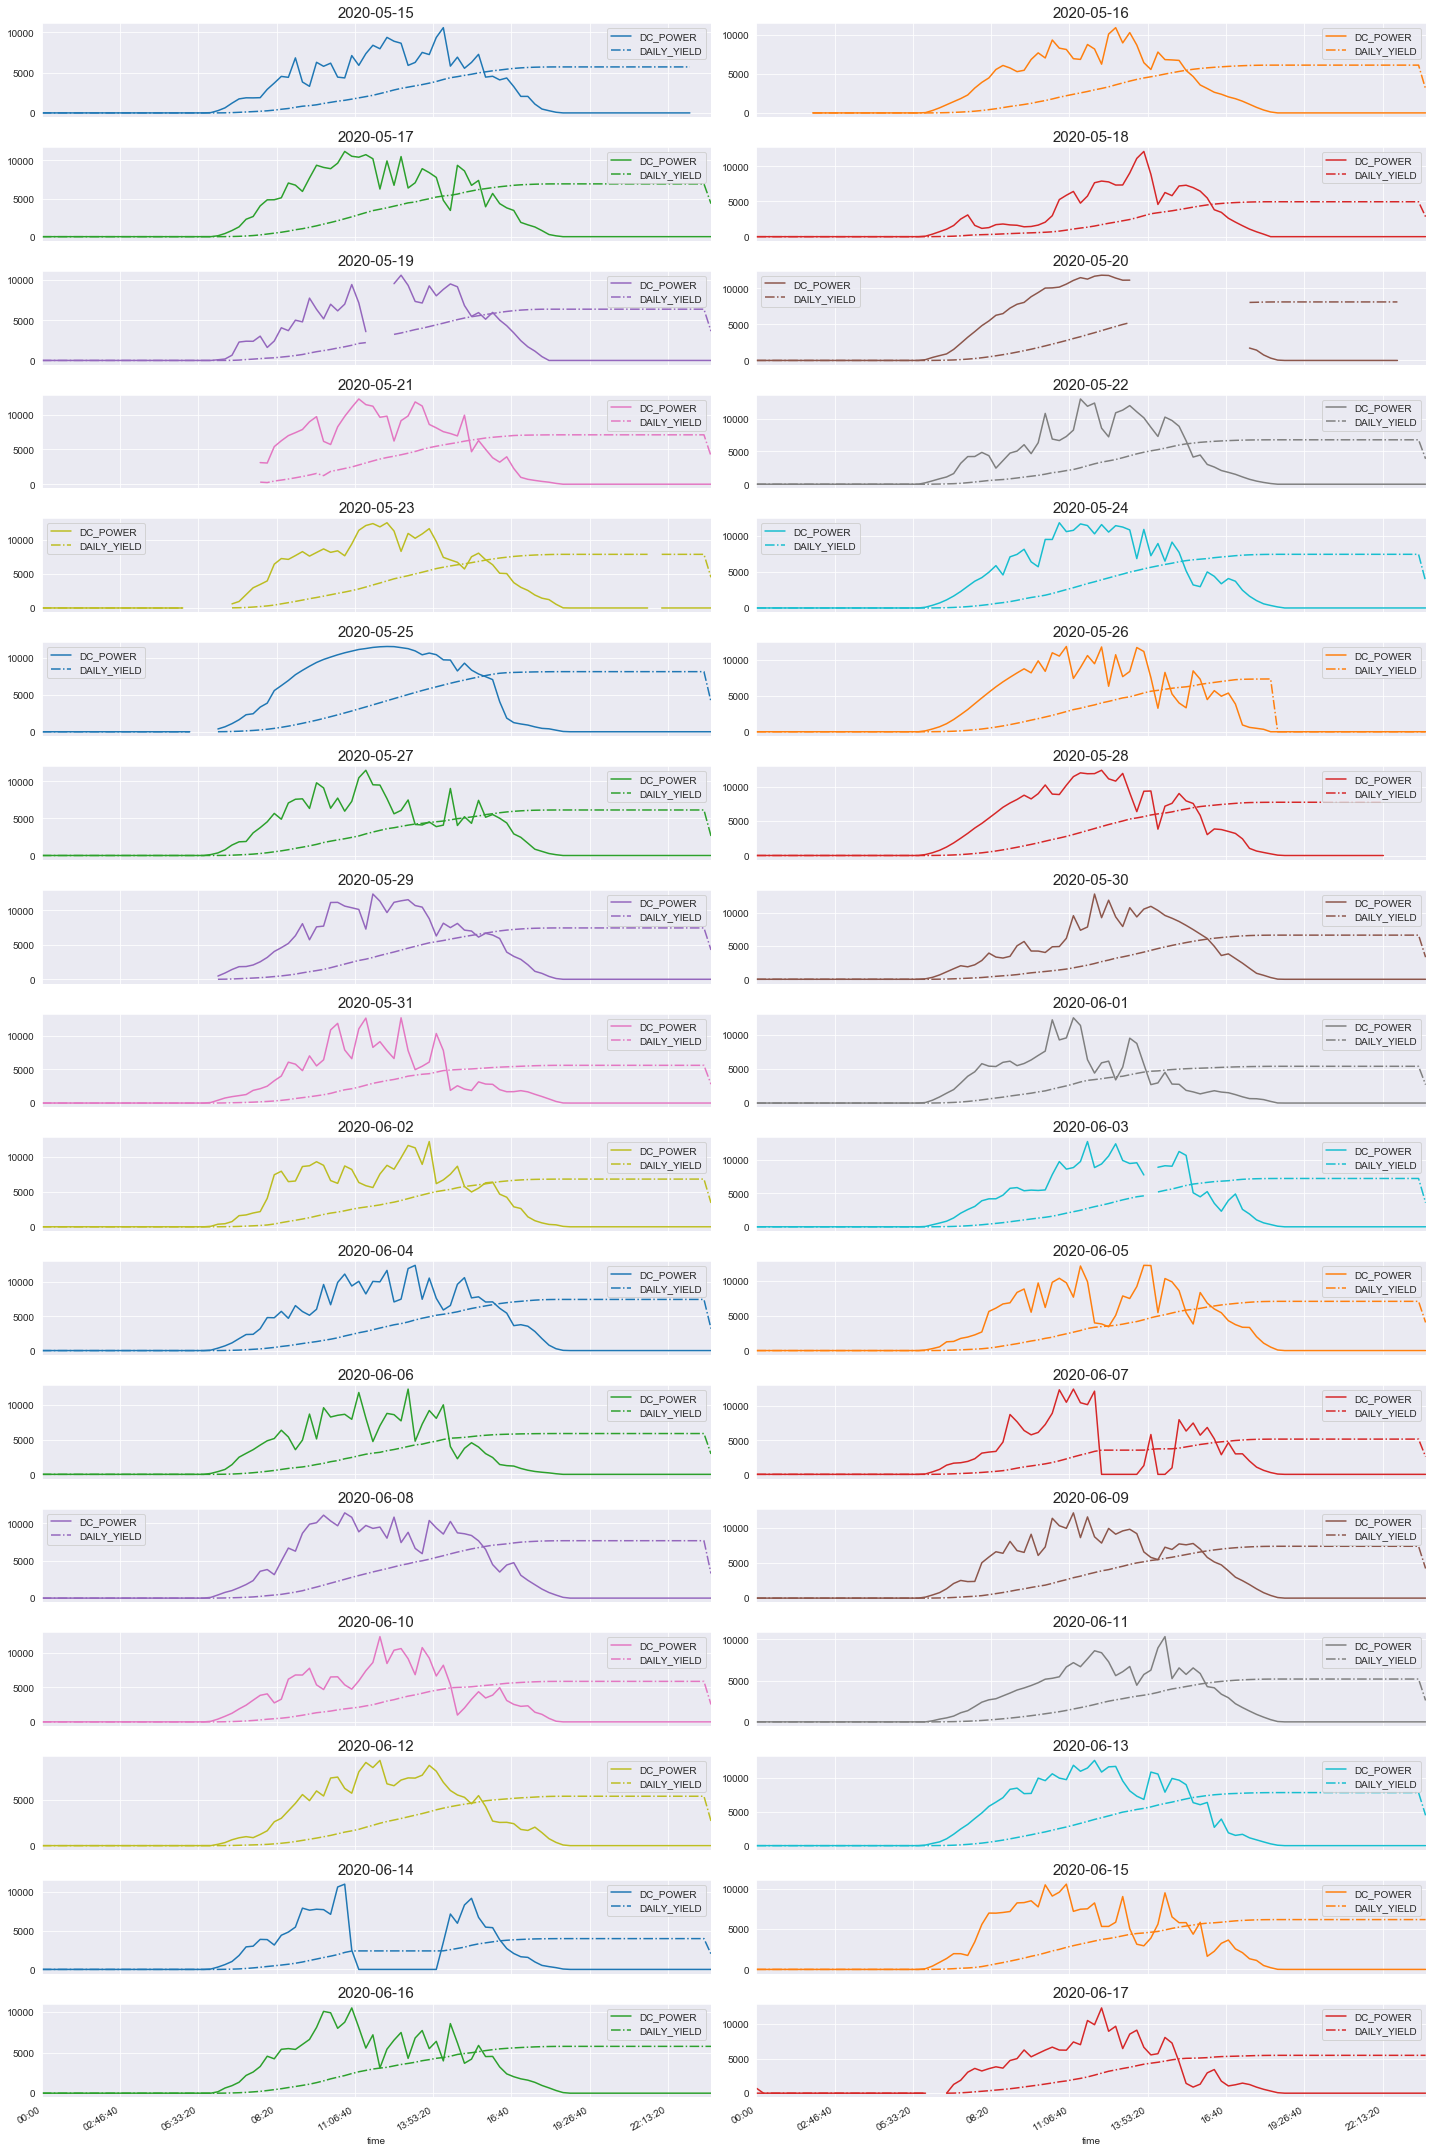

In [400]:
worst_source=df_plant1[df_plant1['SOURCE_KEY']=='bvBOhCH3iADSZry']
worst_source['time']=worst_source['DATE_TIME'].dt.time
worst_source['day']=worst_source['DATE_TIME'].dt.date

ax=worst_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
worst_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=ax,style='-.')
# loop to plot dc power yield for worst performing inverter by day
i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

Here we see the same charts as above showing DC Power yield by day but solely focused on the worst performing inverter we identified earlier. Here we can clearly see the malfunction or underperforming events on 6-07 and 6-14 where the values abruptly drop to 0 or near 0. It is important to make the distinction between these 0 values and the NULL values we identified ealrier. This confirms that this particular inverter in malfunctioning or underperforming and should be due for inspection or maintenance. In the future, in order to catch these events while happening and maximize DC power generation, we can create a system that could alert us when an inverter is registering power generation values well below the average by having the dc power generated at each inverter compared to an aggreate average. While this is just one idea, the same general concept can be used to identify these same type of problems in teh future. 